# Climate Change Belief Analysis


## Table of contents
1. Defining the problem statement
2. Imports
3. Exploratory data analysis
    3.1 Univariate analysis
    3.2 Bivariate analysis
4. Data preparation for model building

In [1]:
!pip install comet_ml

In [2]:
!pip install wordcloud

In [3]:
#2. Importing librabries
import numpy as np                        # For Mathematical calculations      
import pandas as pd                       # Helps to analyse data  
import seaborn as sns                     # For data visualisation
from matplotlib import pyplot as plt      # For plotting graphs
# plotting
from wordcloud import WordCloud
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer


# Import libraries for Natural Languge Processing
import re
import nltk
from nltk.corpus import stopwords
from html.parser import HTMLParser
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

import warnings
warnings.filterwarnings('ignore')         #Ignoring warnings

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NRamonotsi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NRamonotsi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
# Load dataset 
train = pd.read_csv('climate_train.csv')
test = pd.read_csv('climate_test.csv')
sample_submission = pd.read_csv('climate_sample_submission.csv') 

In [5]:
#Copy of dataset 
train_original=train.copy()
test_original=test.copy()

In [6]:
train.columns

Index(['sentiment', 'message', 'tweetid'], dtype='object')

In [7]:
test.columns

Index(['message', 'tweetid'], dtype='object')

In [8]:
# View the training data
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [9]:
# View the test data 
test.head() 

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [10]:
# View the sample submission
sample_submission.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


In [11]:
sample_submission.shape

(10546, 2)

In [12]:
# Let's see some descriptive statistics from built in the pandas library function describe
train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


In [13]:
# Different data types in the dataset
train.dtypes

sentiment     int64
message      object
tweetid       int64
dtype: object

In [14]:
train.shape, test.shape

((15819, 3), (10546, 2))

In [15]:
#3.Exploratory data analysis

|Value|Sentiment|Description|
|-----|---------|-----------|
|-1 |Anti |The tweet does not believe in man-made Climate Change|
|0 |Neutral |The tweet does not believe in man-made Climate Change |
|1 |Pro |The tweet supports the belief of man-made climate change |
|2 |News |The tweet links to factual news about climate change |

In [16]:
# You can see the number of missing values like this
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [17]:
test.isnull().sum()

message    0
tweetid    0
dtype: int64

In [18]:
#3.1 Univariate analysis

In [19]:
#Frequncy table(Give us count of each category in that variable)
train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [20]:
# Percentage distribution
train['sentiment'].value_counts(normalize=True)

 1    0.539225
 2    0.230103
 0    0.148745
-1    0.081927
Name: sentiment, dtype: float64

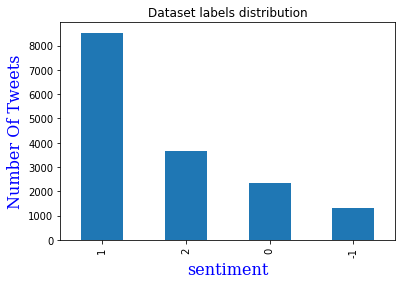

In [21]:
# Distribution of target variable

# Bar graph

font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 16,
        }

train['sentiment'].value_counts().plot.bar()
plt.xlabel("sentiment", fontdict = font)
plt.ylabel("Number Of Tweets", fontdict = font)
plt.title("Dataset labels distribution")
plt.show()

* Distribution of the dataset is skewed to the 1 ('Pro' sentiment).

* The sum of tweets relating to News, Neutral & Anti is less than half of the total tweets.

In [22]:
# Let us inspect the dimensions of the data sets.
print('train dim:', train.shape, 'test dim:', test.shape)
train.iloc[0:2]

train dim: (15819, 3) test dim: (10546, 2)


,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103


In [23]:
#EDA


## Tweet cleaning 
Removing unwanted variables  such as URL's, punctuations, mentions, numbers etc. We are also going to noralize the data by converting all letters to lowercase.

In [24]:
variables = pd.DataFrame(["sentiment", "message", "tweetid"], columns = ["variables"])
variables["definition"] = pd.DataFrame(["sentiment of twitter messages", "twitter messages", "twitter unique id"])
variables.head()

,variables,definition
0,sentiment,sentiment of twitter messages
1,message,twitter messages
2,tweetid,twitter unique id


In [25]:
# Extract tweets from dataframe & creating a new dataframe with only tweets
raw_tweets = train['message']

# View top 5 rows of raw_tweets
raw_tweets[3010:3015]

3010    sorry at drivenorth\nbut at communism_kills\ny...
3011    RT @6esm: Climate change, myth and religion: F...
3012    As reported by the latest claims, the truth ar...
3013    @AJEnglish @derrickg745 It's ok According to t...
3014    U really out here on Twitter expecting everybo...
Name: message, dtype: object

In [26]:
# Replace email addresses with 'email'
tweets = raw_tweets.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Remove unicode strings
tweets = tweets.str.replace(r'(\\u[0-9A-Fa-f]+)', '')
tweets = tweets.str.replace(r'[^\x00-\x7f]', '')

# Convert any url to URL
tweets = tweets.str.replace('((www\.[^\s]+)|(https?://[^\s]+))',
                            'website')

# Remove special characters, numbers, punctuation
tweets = tweets.str.replace('[^a-zA-Z#@]+',' ')

# Remove additional white spaces
tweets = tweets.str.replace(r'\s+', ' ')
tweets = tweets.str.replace(r'^\s+|\s+?$', '')

# Change words to lower case
tweets = tweets.str.lower()

# Remove stop words from tweets
stop_words = set(stopwords.words('english'))

tweets = tweets.apply(lambda x: ' '.join(
    word for word in x.split() if word not in stop_words))

In [27]:
# Viewing the changed message column
tweets[:5]

0    polyscimajor epa chief think carbon dioxide ma...
1      like lack evidence anthropogenic global warming
2    rt @rawstory researchers say three years act c...
3    #todayinmaker# wired pivotal year war climate ...
4    rt @soynoviodetodas racist sexist climate chan...
Name: message, dtype: object

In [28]:
# Creating a dataframe from the cleaned up message column
tweets_df = pd.DataFrame(tweets)

# Add sentiment column to the tweets dataframe
tweets_df['sentiment'] = train['sentiment']

# View the top 5 rows of tweets
tweets_df.head()

,message,sentiment
0,polyscimajor epa chief think carbon dioxide ma...,1
1,like lack evidence anthropogenic global warming,1
2,rt @rawstory researchers say three years act c...,2
3,#todayinmaker# wired pivotal year war climate ...,1
4,rt @soynoviodetodas racist sexist climate chan...,1


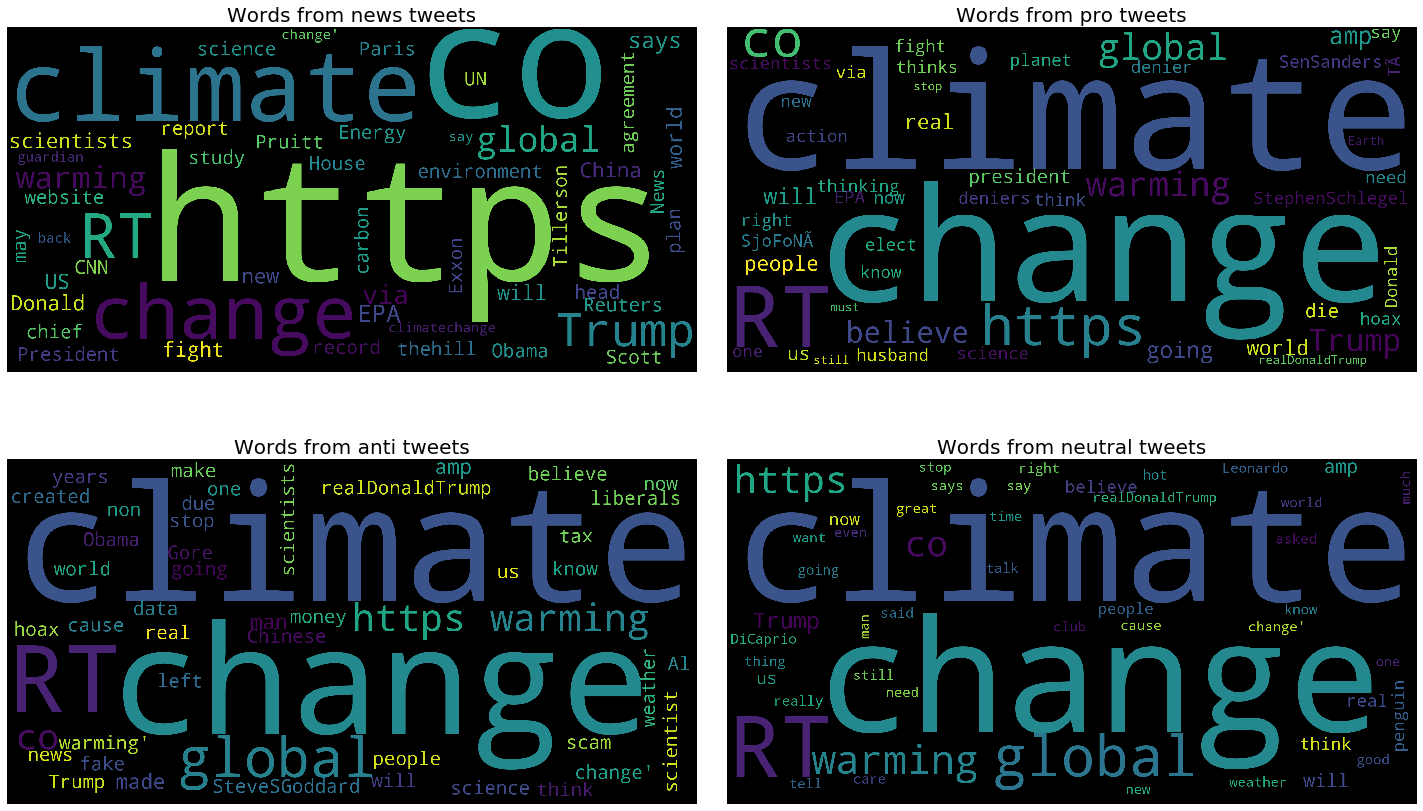

In [29]:
# Plotting word clouds.

news = train[train['sentiment'] == 2]['message']
pro = train[train['sentiment'] == 1]['message']
neutral =train[train['sentiment'] == 0]['message']
Anti = train[train['sentiment'] ==-1]['message']


news = [word for line in news for word in line.split()]
pro = [word for line in pro for word in line.split()]
neutral = [word for line in neutral for word in line.split()]
Anti= [word for line in Anti for word in line.split()]

news = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=100,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(news))

pro = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=100,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(pro))



neutral = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=100,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(neutral))


Anti = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=100,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(Anti))


fig, axs = plt.subplots(2, 2, figsize = (20, 12))

# fig.suptitle('Clouds of polar words', fontsize = 30)

fig.tight_layout(pad = 0)

axs[0, 0].imshow(news)
axs[0, 0].set_title('Words from news tweets', fontsize = 20)
axs[0, 0].axis('off')

# axs[0, 0].tight_layout(pad = 1)

axs[0, 1].imshow(pro)
axs[0, 1].set_title('Words from pro tweets', fontsize = 20)
axs[0, 1].axis('off')

# axs[0, 1].tight_layout(pad = 1)


# axs[1, 0].tight_layout(pad = 1)

axs[1, 0].imshow(Anti)
axs[1, 0].set_title('Words from anti tweets', fontsize = 20)
axs[1, 0].axis('off')

axs[1, 1].imshow(neutral)
axs[1, 1].set_title('Words from neutral tweets', fontsize = 20)
axs[1, 1].axis('off')

# axs[1, 0].tight_layout(pad = 1)

plt.savefig('joint_cloud.png')

* The Climate Change words seems to be the most frequently used word in all the tweet classes. This implies that both classes are tweeting about the Climate Change since it is the main topic.

In [30]:
#3.2 Bivariate analysis

In [31]:
# Understanding Relationship of Hashtags and Sentiment of Tweet

In [32]:
# Function used to extract hashtags
def hashtag_extract(user_input):
    hashtags = []
    # Loop over the words in the tweet
    for text in user_input:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)

    return hashtags

In [33]:
# Extracting Hashtags From News Broadcast
HT_news = hashtag_extract(train["message"][train["sentiment"] == 2])
# Extracting Hashtags From Pro Sentiments
HT_positive = hashtag_extract(train["message"][train["sentiment"] == 1])
# Extracting Hashtags From Neutral Sentiments
HT_normal = hashtag_extract(train["message"][train["sentiment"] == 0])
# Extracting Hashtags From Anti Sentiments
HT_negative = hashtag_extract(train["message"][train["sentiment"] == -1])

# Unnesting List
ht_news = sum(HT_news,[])
ht_positive = sum(HT_positive,[])
ht_normal = sum(HT_normal,[])
ht_negative = sum(HT_negative,[])

In [34]:

# Import libraries for Natural Languge Processing
import re
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from html.parser import HTMLParser
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NRamonotsi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NRamonotsi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

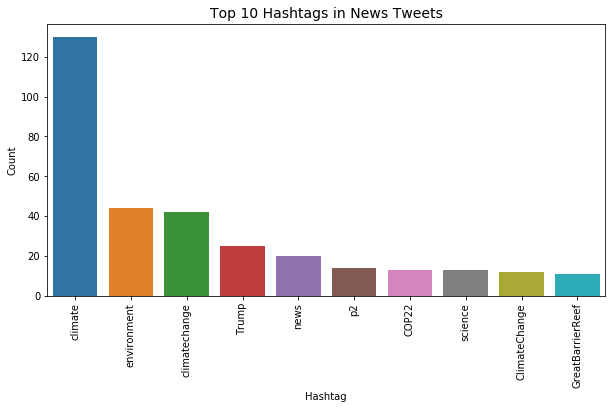

In [35]:
# News Broadcast
a = nltk.FreqDist(ht_news)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(10,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
plt.setp(ax.get_xticklabels(),rotation='vertical', fontsize=10)
plt.title('Top 10 Hashtags in News Tweets', fontsize=14)
plt.show()

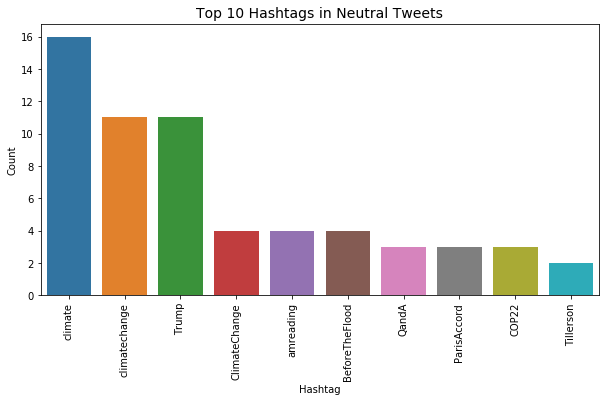

In [36]:
# Neutral Sentiments
a = nltk.FreqDist(ht_normal)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(10,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
plt.setp(ax.get_xticklabels(),rotation='vertical', fontsize=10)
plt.title('Top 10 Hashtags in Neutral Tweets', fontsize=14)
plt.show()

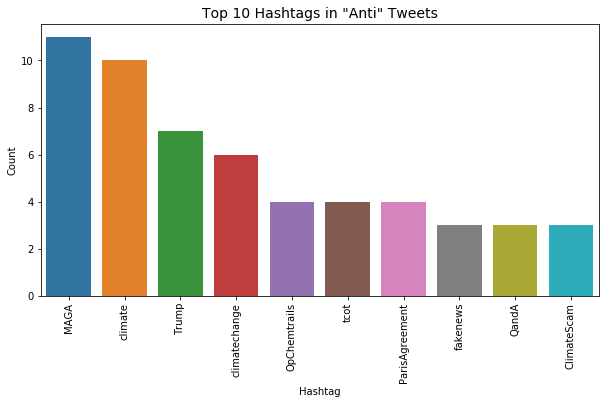

In [37]:
#Negative Sentiments
a = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(10,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
plt.setp(ax.get_xticklabels(),rotation='vertical', fontsize=10)
plt.title('Top 10 Hashtags in "Anti" Tweets', fontsize=14)
plt.show()

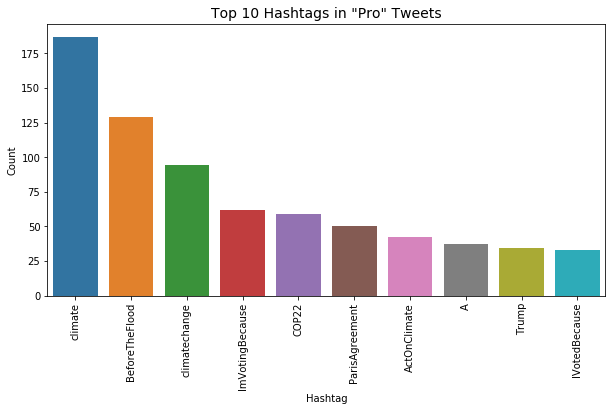

In [38]:
#Positive Sentiments
a = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(10,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
plt.setp(ax.get_xticklabels(),rotation='vertical', fontsize=10)
plt.title('Top 10 Hashtags in "Pro" Tweets', fontsize=14)
plt.show()

In [39]:
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [40]:
#4.Model Building

In [41]:
# Split Into X And Y
y = train["sentiment"]
X = train.drop(["sentiment"], axis = 1)

In [42]:
#Neo
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X["message"])
X_counts.shape
count_vect.vocabulary_.get(u'algorithm')

test_count = count_vect.transform(test["message"])

In [43]:
#neo
from nltk import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from wordcloud import WordCloud
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.preprocessing import MaxAbsScaler, StandardScaler

In [44]:
#neo
sc = MaxAbsScaler().fit(X_counts)
X_counts = sc.transform(X_counts)
test_count = sc.transform(test_count)

In [45]:
train.head()



,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [46]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
#Dataset has been divided into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [49]:
#neo
X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size = 0.3, random_state = 1)

In [50]:
logReg_clf = LogisticRegression(max_iter = 2000)
lr = logReg_clf.fit(X_train, y_train)

In [51]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score
from sklearn import metrics

In [52]:
# LOGISTIC REGRESSION
lr_pred = logReg_clf.predict(X_test)
print('Classification Report')
print("F1-Score:", classification_report(y_test.astype(int), lr_pred))

Classification Report
F1-Score:               precision    recall  f1-score   support

          -1       0.76      0.35      0.48       364
           0       0.61      0.40      0.48       708
           1       0.76      0.87      0.81      2593
           2       0.76      0.80      0.78      1081

    accuracy                           0.75      4746
   macro avg       0.72      0.61      0.64      4746
weighted avg       0.74      0.75      0.73      4746



In [53]:
# LOGISTIC REGRESSION
lr_pred = logReg_clf.predict(X_test)
print('Classification Report')
print("F1-Score:", classification_report(y_test.astype(int), lr_pred))
print(f"Accuracy score : {accuracy_score(y_test,lr_pred)}")
print(f"f1 score : {f1_score(y_test,lr_pred,average='weighted')}")

Classification Report
F1-Score:               precision    recall  f1-score   support

          -1       0.76      0.35      0.48       364
           0       0.61      0.40      0.48       708
           1       0.76      0.87      0.81      2593
           2       0.76      0.80      0.78      1081

    accuracy                           0.75      4746
   macro avg       0.72      0.61      0.64      4746
weighted avg       0.74      0.75      0.73      4746

Accuracy score : 0.7467340918668353
f1 score : 0.7314871061738841


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [55]:
model = LogisticRegression()

In [56]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
pred_test= model.predict(X_test)

In [58]:
accuracy_score(y_test,pred_test)

0.7467340918668353

In [59]:
# Different Models
Logireg = LogisticRegression()
LinSVC = LinearSVC()
NB = MultinomialNB()
onevrest = OneVsRestClassifier(LinearSVC(),n_jobs=4)
vectorizer = TfidfVectorizer(
                             min_df=2, 
                             max_df=0.9,strip_accents='unicode',
                             analyzer='word',
                             ngram_range=(1, 2))

In [60]:
'''
# Create Pipeline
text_clf = Pipeline([('tfidf',TfidfVectorizer(
                             min_df=3, 
                             max_df=0.7,strip_accents='unicode',
                             analyzer='word',
                             ngram_range=(1, 3))),('clf',LinSVC)])
'''    

"\n# Create Pipeline\ntext_clf = Pipeline([('tfidf',TfidfVectorizer(\n                             min_df=3, \n                             max_df=0.7,strip_accents='unicode',\n                             analyzer='word',\n                             ngram_range=(1, 3))),('clf',LinSVC)])\n"

In [61]:
# Fit Models
linsvcmodel = LinSVC.fit(X_train,y_train) #fits this pipeline using the training data
naivebayesmodel = NB.fit(X_train,y_train)
logisticregression = Logireg.fit(X_train,y_train)


In [62]:
# Choose Model
text_clf = linsvcmodel

In [63]:
# Predict
predictions = text_clf.predict(X_test)

In [64]:
# Metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score
from sklearn import metrics
print(classification_report(y_test,predictions))
print(f"Accuracy score : {accuracy_score(y_test,predictions)}")
print(f"f1 score : {f1_score(y_test,predictions,average='weighted')}")

              precision    recall  f1-score   support

          -1       0.64      0.48      0.55       364
           0       0.57      0.47      0.52       708
           1       0.79      0.83      0.81      2593
           2       0.75      0.80      0.77      1081

    accuracy                           0.74      4746
   macro avg       0.69      0.65      0.66      4746
weighted avg       0.74      0.74      0.74      4746

Accuracy score : 0.7435735356089338
f1 score : 0.7376689999474002


In [65]:
text_clf2 = naivebayesmodel 
predictions2 = text_clf2.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score
from sklearn import metrics
print(classification_report(y_test,predictions2))
print(f"Accuracy score : {accuracy_score(y_test,predictions2)}")
print(f"f1 score : {f1_score(y_test,predictions2,average='weighted')}")


              precision    recall  f1-score   support

          -1       0.71      0.14      0.24       364
           0       0.76      0.21      0.33       708
           1       0.69      0.93      0.79      2593
           2       0.78      0.72      0.75      1081

    accuracy                           0.71      4746
   macro avg       0.74      0.50      0.53      4746
weighted avg       0.72      0.71      0.67      4746

Accuracy score : 0.713653603034134
f1 score : 0.6709735735773984


In [66]:
text_clf3 = logisticregression
predictions3 = text_clf3.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score
from sklearn import metrics
print(classification_report(y_test,predictions3))
print(f"Accuracy score : {accuracy_score(y_test,predictions3)}")
print(f"f1 score : {f1_score(y_test,predictions2,average='weighted')}")

              precision    recall  f1-score   support

          -1       0.76      0.35      0.48       364
           0       0.61      0.40      0.48       708
           1       0.76      0.87      0.81      2593
           2       0.76      0.80      0.78      1081

    accuracy                           0.75      4746
   macro avg       0.72      0.61      0.64      4746
weighted avg       0.74      0.75      0.73      4746

Accuracy score : 0.7467340918668353
f1 score : 0.6709735735773984


In [67]:
# LOGISTIC REGRESSION
lr_pred = logReg_clf.predict(X_test)
print('Classification Report')
print("F1-Score:", classification_report(y_test.astype(int), lr_pred))
print(f"Accuracy score : {accuracy_score(y_test,predictions)}")
print(f"f1 score : {f1_score(y_test,predictions,average='weighted')}")

Classification Report
F1-Score:               precision    recall  f1-score   support

          -1       0.76      0.35      0.48       364
           0       0.61      0.40      0.48       708
           1       0.76      0.87      0.81      2593
           2       0.76      0.80      0.78      1081

    accuracy                           0.75      4746
   macro avg       0.72      0.61      0.64      4746
weighted avg       0.74      0.75      0.73      4746

Accuracy score : 0.7435735356089338
f1 score : 0.7376689999474002


In [68]:
#Predict Raw Data

In [69]:
submission=pd.read_csv('climate_sample_submission.csv')
submission.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


In [70]:
#Convert the submission to .csv format and make submission to check the accuracy on the leaderboard.
pd.DataFrame(submission, columns=['tweetid','sentiment']).to_csv('lr_clf.csv',index = False)

In [71]:
test_pred = logReg_clf.predict(test_count)
submission = pd.DataFrame(test["tweetid"], columns = ["tweetid"])
submission["sentiment"] = test_pred
submission.head()
#create a csv submission for Kaggle
submission.to_csv('logReg_clf.csv', index=False)